**Import training and testing dataset**

In [1]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2025-07-09 14:25:54--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873 [following]
--2025-07-09 14:25:55--  https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc697e4137b6bf2fa8434ea6cc53.dl.dropboxusercontent.com/cd/0/inline/CtKBkmlOd1sSXzy7WkWTtGq-rKR9G7g6k2bl5-tOV8W8FssAJtUvJAbo1bL6ibCjrsbJ-LYAAmqZ10UMnx1-zz82zv5bFySOeirNZIEugIPQ4WW6seoVm9Xzk9dX00GJ_f8gFFWDovrUtJPgi1i0547f/file# [following]
--2025-07-09 14:25:55--  https://uc697e4137b6bf2fa8434ea6cc53.dl.dropboxusercontent.com

**Unzipping the dataset**

In [2]:
!unzip training_set.zip
!unzip test_set.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set

**Imports**

In [3]:
import tensorflow
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, Input
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as k
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Parameters initialization**

In [4]:
train_data = r"/content/training_set/training_set"
test_data = r"/content/test_set/test_set"

if k.image_data_format()=='channels_first' :
  input_shape = (3, 150, 150)
else :
  input_shape = (150, 150, 3)

batch_size = 20
epochs = 20

**Image generation to train the model**

In [5]:
train_data_gen = ImageDataGenerator(
    rescale = 1. / 255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
    )

test_data_gen = ImageDataGenerator(
    rescale = 1. / 255
    )

train_gen = train_data_gen.flow_from_directory(
    train_data,
    target_size = (150, 150),
    class_mode = 'binary',
    classes=['cats', 'dogs']
)

test_gen = test_data_gen.flow_from_directory(
    test_data,
    target_size = (150, 150),
    class_mode = 'binary',
    shuffle=False
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [6]:
steps_per_epoch = 8000 // batch_size
validation_steps = 2000 // batch_size

**Build the CNN model**

In [7]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 350464)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    22,429,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

**Model Compilation**

In [8]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 350464)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    22,429,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

**Model Fitting**

In [9]:
training = model.fit(
    train_gen,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = test_gen,
    validation_steps=validation_steps
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
251/400 ━━━━━━━━━━━━━━━━━━━━ 30s 204ms/step - accuracy: 0.5466 - loss: 2.9611

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


400/400 ━━━━━━━━━━━━━━━━━━━━ 59s 139ms/step - accuracy: 0.5671 - loss: 2.2964 - val_accuracy: 0.6920 - val_loss: 0.5906
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 78s 135ms/step - accuracy: 0.6791 - loss: 0.6120 - val_accuracy: 0.7177 - val_loss: 0.5649
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 80s 130ms/step - accuracy: 0.6937 - loss: 0.5848 - val_accuracy: 0.7108 - val_loss: 0.5628
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.7031 - loss: 0.5731 - val_accuracy: 0.7182 - val_loss: 0.5578
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 53s 131ms/step - accuracy: 0.7238 - loss: 0.5467 - val_accuracy: 0.7098 - val_loss: 0.5663
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 52s 129ms/step - accuracy: 0.7340 - loss: 0.5338 - val_accuracy: 0.7385 - val_loss: 0.5617
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 52s 129ms/step - accuracy: 0.7410 - loss: 0.5265 - val_accuracy: 0.7459 - val_loss: 0.5342
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 53s 132ms/step - accuracy: 0.7456 - loss: 0.5236 - val

**Model Accuracy**

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


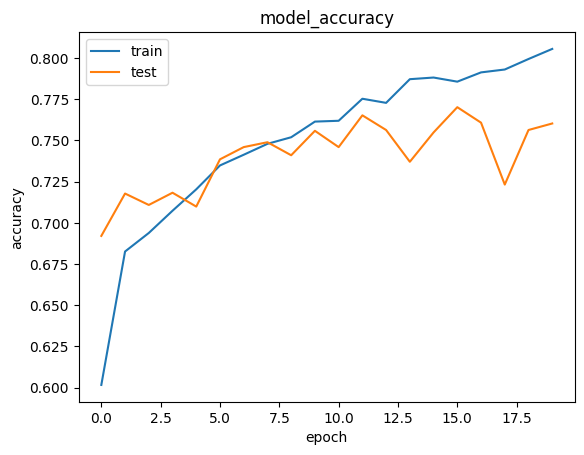

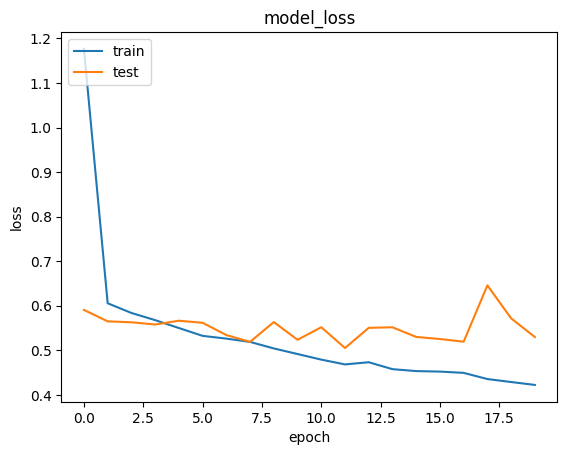

In [10]:
%matplotlib inline

print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

**Image Prediction**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.]]
Prediction 1:  Cat


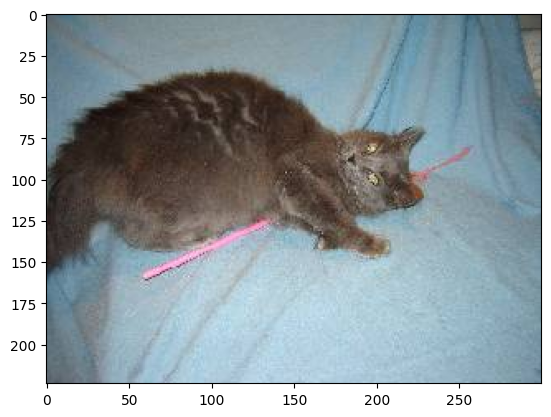

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[1.]]
Prediction 2:  Dog


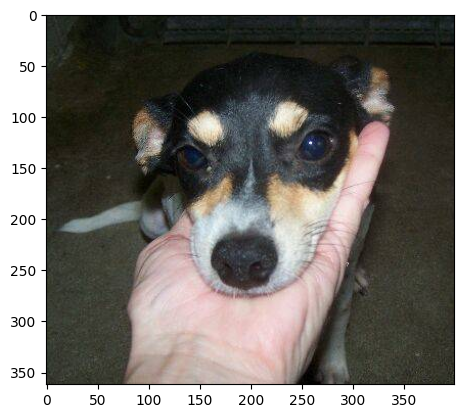

In [14]:
# Prediction 1
img_pred1 = image.load_img("/content/test_set/test_set/cats/cat.4016.jpg", target_size=(150, 150))
img_pred1 = image.img_to_array(img_pred1)
img_pred1 = np.expand_dims(img_pred1, axis=0)

result1 = model.predict(img_pred1)
print(result1)

if result1[0][0] == 1 :
  prediction1 = "Dog"
else :
  prediction1 = "Cat"

print("Prediction 1: ", prediction1)

img = mpimg.imread('/content/test_set/test_set/cats/cat.4016.jpg')
imgplot = plt.imshow(img)
plt.show()

# Prediction 2
img_pred2 = image.load_img("/content/test_set/test_set/dogs/dog.4016.jpg", target_size=(150, 150))
img_pred2 = image.img_to_array(img_pred2)
img_pred2 = np.expand_dims(img_pred2, axis=0)

result2 = model.predict(img_pred2)
print(result2)

if result2[0][0] == 1 :
  prediction2 = "Dog"
else :
  prediction2 = "Cat"

print("Prediction 2: ", prediction2)

img = mpimg.imread('/content/test_set/test_set/dogs/dog.4016.jpg')
imgplot = plt.imshow(img)
plt.show()